<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Machine Learning(기계 학습):
    *   지도학습(supervised learning): 레이블이 있는 데이터를 학습.
        *   분류(classification): 클래스를 분류.
        *   회귀(regression): 숫자 예측.
    *   비지도학습(unsupervised learning): 레이블이 없는 데이터를 학습.
    *   준지도학습(semi-supervised learning): 비지도학습 + 전문가 시스템.
    *   강화학습(reinforcement learning): 보상과 벌칙을 통해서 학습.

# Objectives

fish 데이터 셋에서 물고기의 무게(Weight) 예측.
*   Perch(농어)의 무게를 길이 특성만으로 예측.
    *   Weight(관심 변수, 종속 변수, 레이블) ~ Length(독립 변수, 특성)
    *   KNN, Linear Regression
*   Perch(농어)의 무게를 모든 특성들을 사용해서 예측.
    *   Weight ~ Length + Diagonal + Height + Width
    *   Linear Regression

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures  # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline  # Transformer(변환기)와 Estimator(예측기)를 연결해 주는 클래스
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 숫자 예측.
from sklearn.linear_model import LinearRegression  # 선형 회귀를 사용한 숫자 예측.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 회귀 평가 지표들

# 데이터 준비

In [3]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [4]:
fish = pd.read_csv(fish_csv)

In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
# perch(농어) 데이터 셋
perch = fish[fish.Species == 'Perch']

In [7]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [8]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
*   특성(feature), 독립 변수: Length
*   타겟(target), 레이블(label), 종속(관심) 변수: Weight

In [10]:
# X: 특성 (2차원) 배열 - 독립 변수, y: 타겟 (1차원) 배열 - 종속 변수
X = perch[['Length']].values.copy()  #> (56, 1) shape의 2차원 배열
y = perch['Weight'].values.copy()  #> (56,) shape의 1차원 배열

In [11]:
X.shape, y.shape

((56, 1), (56,))

# train/test split

In [12]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [13]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

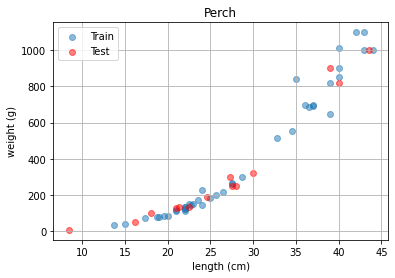

In [18]:
# Weight ~ Length 시각화. 훈련 셋/테스트 셋의 색깔을 다르게.
plt.scatter(X_tr, y_tr, alpha=0.5, label='Train')
plt.scatter(X_te, y_te, alpha=0.5, color='red', label='Test')

plt.legend()
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.title('Perch')
plt.grid()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN(k-Nearest Neighbors) Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측하는 모델.

In [19]:
knn_reg = KNeighborsRegressor()  # k=5인 KNN 회귀 모델을 생성

In [20]:
knn_reg.fit(X_tr, y_tr)  # 모델 훈련

KNeighborsRegressor()

In [21]:
tr_pred = knn_reg.predict(X_tr)  # 훈련 셋 예측값 - 훈련 셋 농어 무게 예측값
tr_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [22]:
y_tr  # 훈련 셋 실젯값 - 훈련 셋 농어 무게 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [26]:
# 0번 훈련 셋 샘플의 가장 가까운 이웃 5개
neighbor_index = knn_reg.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
neighbor_index

array([[ 0, 10, 36,  2, 17]])

In [27]:
y_tr[neighbor_index[0]]

array([ 85.,  85.,  80.,  78., 115.])

In [28]:
y_tr[neighbor_index[0]].mean()

88.6

In [29]:
# 테스트 셋의 (농어 무게) 예측값
te_pred = knn_reg.predict(X_te)
te_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [30]:
# 테스트 셋 (농어 무게) 실젯값
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])